In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\milan\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Unavailable!


In [4]:
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","train")
test_path=os.path.join(curr_dir,"datasets","test")
valid_path= os.path.join(curr_dir,"datasets","val")


Current Dir  c:\Users\milan\OneDrive\Documents\Dell\OneDrive\Desktop\Forest_Fire\Forest_fire_Detection


In [5]:
# List all the classes
classes = os.listdir(train_path)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')


Number of Classes: 2
Classes: ['fire', 'nofire']


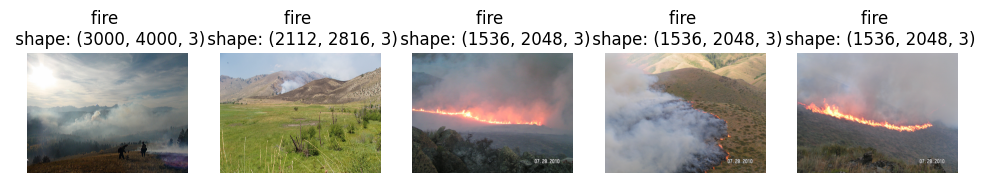

In [6]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_path, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

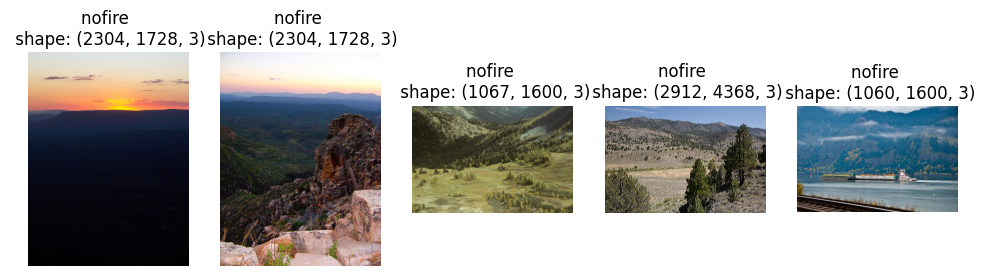

In [7]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_path, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [8]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    valid_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [9]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [10]:
# Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

Epoch 1/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 449s 8s/step - accuracy: 0.7449 - loss: 0.5016 - val_accuracy: 0.7344 - val_loss: 0.5270
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6562 - loss: 0.5645 - val_accuracy: 0.7135 - val_loss: 0.5598
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 471s 8s/step - accuracy: 0.7495 - loss: 0.5025 - val_accuracy: 0.7578 - val_loss: 0.4798
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6562 - loss: 0.5949 - val_accuracy: 0.7552 - val_loss: 0.4702
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 430s 7s/step - accuracy: 0.8010 - loss: 0.4379 - val_accuracy: 0.7839 - val_loss: 0.4472
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8125 - loss: 0.3636 - val_accuracy: 0.7812 - val_loss: 0.4426
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 436s 8s/step - accuracy: 0.7974 - loss: 0.4372 - val_accuracy: 0.7500 - val_loss: 0.5734
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7812 - loss: 0.3429 - val_accuracy: 0.7552 - val_l

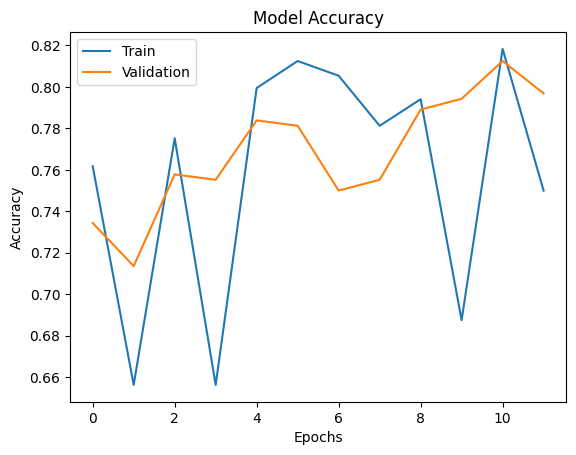

In [14]:
# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
     

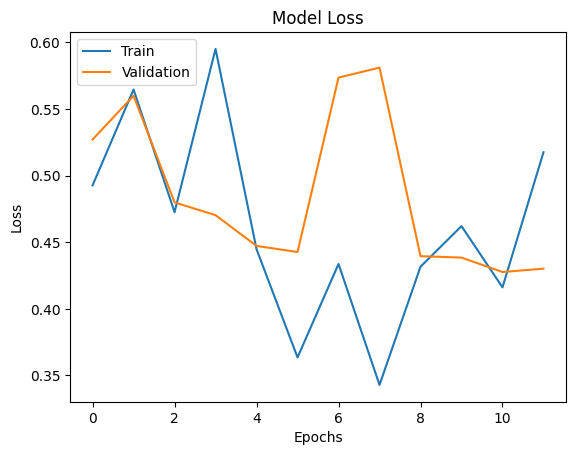

In [15]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
     

In [17]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.8012 - loss: 0.4265
Test Accuracy: 0.8021


In [18]:
# Save the model
model.save('FFD.keras')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [20]:
os.listdir(os.path.join(curr_dir,"datasets","test","nofire"))

['23289748533_1a14a0f249_o.jpg',
 '24498907094_491ca433dd_o.jpg',
 '33696343816_811bd98925_o.jpg',
 '35554264024_b33afa21ac_o.jpg',
 '35581707273_fed23248e8_o.jpg',
 '36644001004_f3e3a56edc_o.jpg',
 '39728540251_888dc24afa_o.jpg',
 '41058079202_08ce34a338_o.jpg',
 '42376136734_b4524237bf_o.jpg',
 '43078090081_07d1f9ec0f_o.jpg',
 '45636031272_8408d32834_o.jpg',
 '49200563427_e5295b4455_o.jpg',
 '49422069676_3e89abc052_o.jpg',
 '50010867961_903b6432f7_o.jpg',
 '50380847112_db217aea45_o.jpg',
 '51099217941_143488e656_o.jpg',
 '52357656897_dde5e5a66a_o.jpg',
 '52358616216_ec885ff145_o.jpg',
 '52358931719_b6fbcc77f2_o.jpg',
 '52359026765_4a4ba189c8_o.jpg',
 '52359041065_1566fd6ec1_o.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 '52452051055_4e2a4e4de0_o.jpg',
 '53078944067_43c7e3552a_o.jpg',
 'adrian-mag-l9p-7JBmVFE-unsplash.jpg',
 'alan-hardman-pLq3oZDUEWk-unsplash.jpg',
 'ales-krivec-7-Og8aZTRyM-unsplash.jpg',
 'ales-krivec-sTEg_SLAyUs-unsplash.jpg',
 'ales-krivec-VfMgiZscSXE-unsplash.jpg',
 'a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


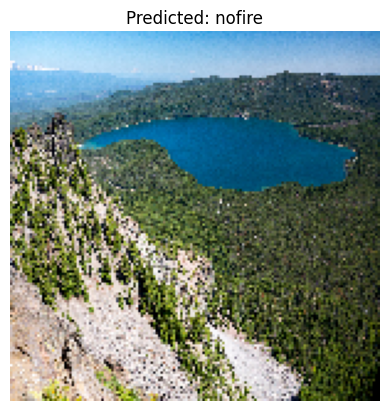

In [21]:
predict_fire(os.path.join(curr_dir,"datasets","test","nofire",'52358931719_b6fbcc77f2_o.jpg'))